In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

# Houses Kaggle Competition (bis 🔥) 

[<img src='https://github.com/lewagon/data-images/blob/master/ML/kaggle-batch-challenge.png?raw=true' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Let's re-use our previous pipeline built in the module `05-07-Ensemble-Methods` and improve final predictions using a Neural Network!

# Re-use already-built preprocessing

## Load data

In [2]:
# Let's load our training dataset
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

# You don't have access to y_yest! Only Kaggle has it.
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

print(X.shape, y.shape, X_test.shape)

(1460, 80) (1460,) (1459, 80)


## Import preprocessor

You will find the data-preprocessing pipeline that was built in our previous iteration in `utils/preprocessor.py`. 

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py`

In [9]:
from utils.preprocessor import create_preproc
preproc = create_preproc(X)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f7d72ffc790>))])

❓ Fit the preprocessor on your train set and create your feature matrix `X_preproc` that will be used by the Neural Network

In [13]:
# YOUR CODE HERE
X_preproc = preproc.fit_transform(X,y)


In [15]:
print(X_preproc.shape, X.shape)

(1460, 162) (1460, 80)


# Your prediction in Keras

This is your first **regression** task with Keras! 
- The cell below contains the compiler and the hyper-parameters we recommend you to start with.
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize `rmsle` (Root Mean Square Log Error). As you can see, we were to specify `msle` direcly as loss-function with Keras! Just remember to take square-root of your loss results to read your rmsle metric.
- The best boosted-tree `rmsle` score to beat is around **0.13**

❓ **Question** ❓
- Your responsibility is to build the best model architecture, and to control the epoch number to avoid overfitting.
- We recommand you to create a train/val split upfront to visually control the validation loss thanks to `plot_history`

In [17]:
# Create a train val split here
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_preproc, y, test_size=0.30)
print(X_train.shape, y_train.shape)

(1022, 162) (1022,)


In [24]:
y_train

243     120000
573     170000
560     121500
1033    230000
805     227680
         ...  
509     124500
219     167240
22      230000
630     124000
396     123000
Name: SalePrice, Length: 1022, dtype: int64

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Dense(50, activation='relu', input_dim=162))
model.add(layers.Dense(7, activation='softmax'))

2021-08-23 16:43:02.372803: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-23 16:43:02.372843: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-08-23 16:43:03.229973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-23 16:43:03.230010: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-23 16:43:03.230025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Nandosoq): /proc/driver/nvidia/version does not exist
2021-08-23 16:43:03.230228: I tensorflow/core/platform/cpu_feature_g

In [20]:
def initialize_model():

    ### YOUR MODEL ARCHITECTURE HERE
    from tensorflow.keras.models import Sequential
    from tensorflow.keras import layers

    model = Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=162))
    model.add(layers.Dense(7, activation='softmax'))

    
    # Recommended compilator
    model.compile(optimizer='adam',
                  loss='msle')#, # directly optimize for the squared log error!
    return model

model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100, # Play with this until your validation loss overfit
                    batch_size=16, # Keep batch size to 16 today
                    verbose=0)

2021-08-23 16:46:47.044347: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-23 16:46:47.044660: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2208005000 Hz


In [21]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('MSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

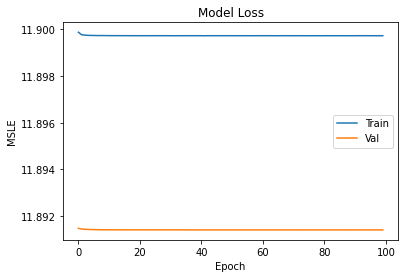

In [23]:
plot_history(history)

In [22]:
model.evaluate(X_val, y_val)

14/14 [==============================] - 0s 1ms/step - loss: 141.4057


141.40565490722656

## (Optional): AutoML with Keras Tuner

Try to find the best number of neurons and hidden layers **automatically** using the amazing [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner)




In [ ]:
# TODO: Solution

# 🏅FINAL SUBMISSION

Predict the house prices of your test set and submit your results to kaggle! Be careful with the format of the exported `.csv`.

In [ ]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [ ]:
# YOUR CODE HERE